In [0]:
# import all necessary libraries to use high level API for training,testing,visualizing results 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from tensorflow import keras
from keras import optimizers
from keras import losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.preprocessing import StandardScaler

%matplotlib inline

print('Libraries imported.')

Libraries imported.


***USER*** ***DEFINED*** ***FUNCTIONS*** ***TO*** ***ANALYZE*** ***RESULT***

In [0]:
import matplotlib.pyplot as plt

column_names = ['input_1', 'input_2', 'input_3', 'root','Initial_value']

#Functions used to visualize the training and testing result metrics using graph
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), (h['val_loss']), label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

def plot_accuracy(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    v=[]
    for x in h['val_loss']:
        v.append((1-x)*100)
    plt.plot(range(x_lim), (v), label = 'Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    return

def plot_predictions(preds, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds, y_test, 'ro')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    plt.xlim([-0.5, 0.5])
    plt.ylim([-0.5, 0.5])
    plt.plot([-0.5, 0.5], [-0.5, 0.5], 'b--')
    plt.show()
    return

#Function to compare different predictions of trained and untrained model
def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

In [0]:
#Input the dataset and check if its loaded properly
df = pd.read_csv('NR.csv', names = column_names) 
df.head()

,input_1,input_2,input_3,root,Initial_value
0,7.444832,16.437393,-18.314700,-3.021954,-3.449212
1,8.711237,-13.262038,-32.008103,-1.301266,-2.123668
2,-5.836047,-1.010973,16.765573,1.610519,9.896467
3,2.945051,13.090892,-5.789253,0.405283,1.164366
4,7.396679,-23.788364,-49.452191,4.652963,9.542230


**DATA** **PREPROCESSING** **STEPS**

In [0]:
#Check if there is any missing data
df.isna().sum()
df.isnull().any()

input_1          False
input_2          False
input_3          False
root             False
Initial_value    False
dtype: bool

In [0]:
#data normalization using mean and standard deviation of entire dataset
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,input_1,input_2,input_3,root,Initial_value
0,1.371263,0.876604,-0.674352,-0.890468,-0.598740
1,1.603823,-0.715812,-1.177373,-0.383152,-0.369616
2,-1.067601,-0.058938,0.614306,0.475338,1.708100
3,0.544936,0.697172,-0.214235,0.119995,0.198731
4,1.362421,-1.280210,-1.818173,1.372351,1.646869


In [0]:
y_mean = df['root'].mean()
y_std = df['root'].std()

#Function to convert back into original data value from normalized value
def convert_label_value(pred):
    return int(pred * y_std + y_mean)


In [0]:
#Extract input data
X = df_norm.iloc[:, :3]
X.head()

,input_1,input_2,input_3
0,1.371263,0.876604,-0.674352
1,1.603823,-0.715812,-1.177373
2,-1.067601,-0.058938,0.614306
3,0.544936,0.697172,-0.214235
4,1.362421,-1.280210,-1.818173


In [0]:
#Extract output values
Y = df_norm.iloc[:, -2]
Y.head()

0   -0.890468
1   -0.383152
2    0.475338
3    0.119995
4    1.372351
Name: root, dtype: float64

In [0]:
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (105472, 3)
Y_arr shape:  (105472,)


In [0]:
#Split dataset into training and testing data
X_train_full, X_test, y_train_full, y_test = train_test_split(X_arr, Y_arr, test_size = 0.029126, shuffle = True, random_state=0)

print('X_train shape: ', X_train_full.shape)
print('y_train shape: ', y_train_full.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (102400, 3)
y_train shape:  (102400,)
X_test shape:  (3072, 3)
y_test shape:  (3072,)


In [0]:
#Split training data further into training and validation data
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=0)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_valid shape: ', X_valid.shape)
print('y_valid shape: ', y_valid.shape)

X_train shape:  (76800, 3)
y_train shape:  (76800,)
X_valid shape:  (25600, 3)
y_valid shape:  (25600,)


***BUILD*** ***THE*** ***MODEL*** 

In [0]:
#Set initial state to random value to get same initialization on each run
np.random.seed(0)
tf.random.set_seed(0)

#Configure the model and compile
def get_model():
    model = Sequential([
        Dense(5, input_shape = (3,), activation = 'relu'),
        Dense(3,  activation = 'relu'),
        Dense(1)
    ])
    optimizers.SGD(learning_rate=0.005,momentum=0.9)
    model.compile(
        loss='mse',
        optimizer='sgd'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 5)                 20        
_________________________________________________________________
dense_70 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 4         
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


***TRAIN*** ***THE*** ***MODEL***

In [0]:
#Use early stopping and callbacks to avoid unnecessary epochs and save best model
early_stopping = EarlyStopping(monitor='val_loss', patience = 1000)
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_model.h5",save_best_only=True)
model = get_model()

#check predictions from an untrained model
preds_on_untrained = model.predict(X_test)

#NN Training starts
start_time=time.time()
history = model.fit(
    X_train, y_train,validation_data=(X_valid,y_valid),
    epochs = 5000,batch_size=3200,
    callbacks = [early_stopping,checkpoint_cb]
)
end_time=time.time()
#NN Training ends
print("Total time taken to train:",end_time-start_time)

Streaming output truncated to the last 5000 lines.
Epoch 2502/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8108 - val_loss: 0.7967
Epoch 2503/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8108 - val_loss: 0.7966
Epoch 2504/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8108 - val_loss: 0.7967
Epoch 2505/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8108 - val_loss: 0.7966
Epoch 2506/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8108 - val_loss: 0.7966
Epoch 2507/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8108 - val_loss: 0.7966
Epoch 2508/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8108 - val_loss: 0.7966
Epoch 2509/5000
24/24 [==============================] - 0s 4ms/step - loss: 0.8109 - val_loss: 0.7966
Epoch 2510/5000
24/24 [==============================] - 0s 4ms/step - loss: 0.8108 - val_loss: 0.7966
Epoch 2511/5000
24/24 

***VISUALIZE*** ***THE*** ***RESULTS***

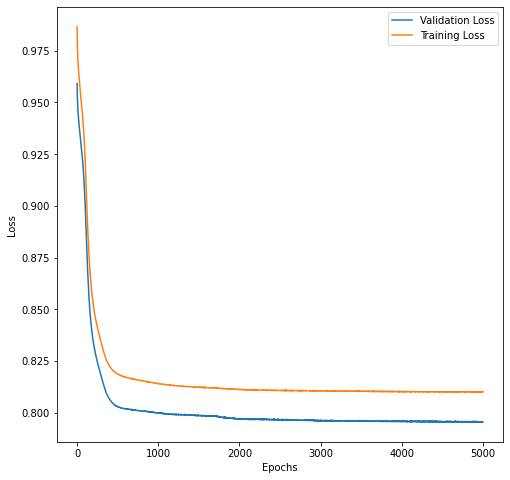

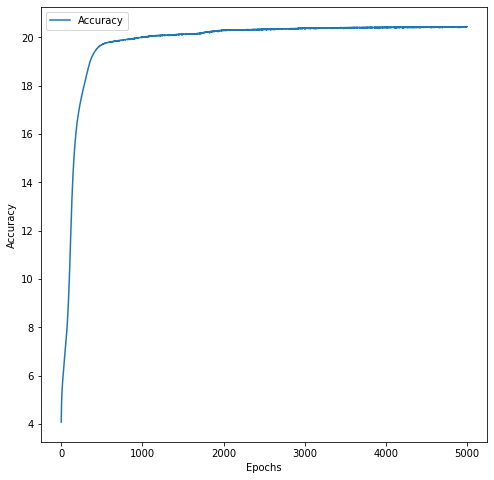

In [0]:
#Check loss and accuracy over the training period
plot_loss(history)
#plot_accuracy(history)

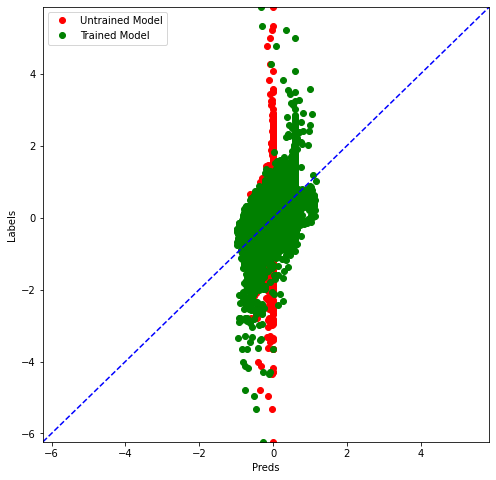

In [0]:
#Predict values for testing data and compare with expected ans
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

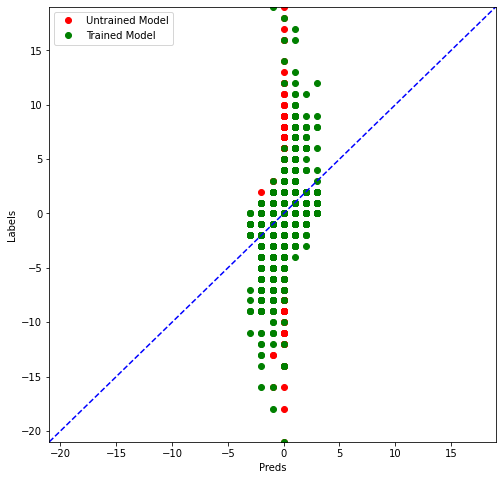

In [0]:
#Compare predictions of untrained and trained model
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_on_untrained, price_on_trained, price_y_test)

***EVALUATE*** ***THE*** ***RESULTS***

In [0]:
#Load the best model during the training period.
model=keras.models.load_model("Best_model.h5")

#Evaluate the model on test data and record the metrics
start=time.time()
loss=model.evaluate(X_test,y_test)
end=time.time()
print("Time taken:",end-start)

96/96 [==============================] - 0s 1ms/step - loss: 0.7304
Time taken: 0.18841862678527832
